In [2]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pickle as pkl 

# Primary Task = People #
# Auxiliary Tasks = {Flowers, Food_Containers} #

In [32]:
def plot(data, task_names):
    keys = ['task_weight', 'task_grad', 'norm{theta_[t + 1]_dev}', 'norm{theta_[t]_task}', 'dot_prod { theta_[t + 1]_dev,  theta_[t]_task }']
    fig, ax = plt.subplots(len(task_names), len(keys), figsize=(35, 20))
    for j in range(data.shape[0]):
        for idx, key in enumerate(keys):
            ax[j][idx].plot(data[j, :, idx], label="{}|{}".format(task_names[j], key))
            ax[j][idx].legend(prop={'size': 12})
            ax[j][idx].set_xlabel('Iteration[smoothed]')
    plt.show()

In [33]:
def vis_file(fname, smooth_factor=17):
    data = pkl.load(open(fname, 'rb'))
    task_names = list(data.keys())
    data_np = np.array(list(data.values()))
    max_len = (data_np.shape[1] // smooth_factor)*smooth_factor
    data_np = data_np[:, :max_len, :]
    data_np = np.reshape(data_np, (3, -1, smooth_factor, 5))
    data_np = data_np.mean(axis=2)
    print(data_np.shape)
    plot(data_np, task_names)

In [34]:
files = glob("sgd_vis_tests/*/*/*/weight_stats.pkl")
print(files)

['sgd_vis_tests/sgd.linear.sgd_lr.1e-1.lr.1e-1.wlr.5e-2/meta_people/0/weight_stats.pkl', 'sgd_vis_tests/sgd.linear.sgd_lr.1e-2.lr.1e-2.wlr.1e-1.RandInit/meta_people/0/weight_stats.pkl', 'sgd_vis_tests/sgd_lr.1e-1.lr.1e-1.wlr.5e-2_stepped_lr/meta_people/0/weight_stats.pkl', 'sgd_vis_tests/sgd.linear.sgd_lr.1e-1.lr.1e-1.wlr.5e-2_stepped_lr/meta_people/0/weight_stats.pkl', 'sgd_vis_tests/sgd.linear.sgd_lr.1e-2.lr.1e-2.wlr.1e-1/meta_people/0/weight_stats.pkl']


# Small Learning Rate #
Observations : 
1. Evolution of primary task gradient matches expectation. Largely positive and higher in scale than the auxiliary tasks.
2. Primary task Gradients do not match expectations. Expected to be largely negative given that the dot product is largely positive but this is not the case.
    a. Could be responsible for why the graph of this run looks different from 
    
* Todo [ldery] - this run was made with using higher-library instead of manual grad computations. Try to figure out bug. Will affect the Adam runs since those experiments were done with Higher.

(3, 340, 5)


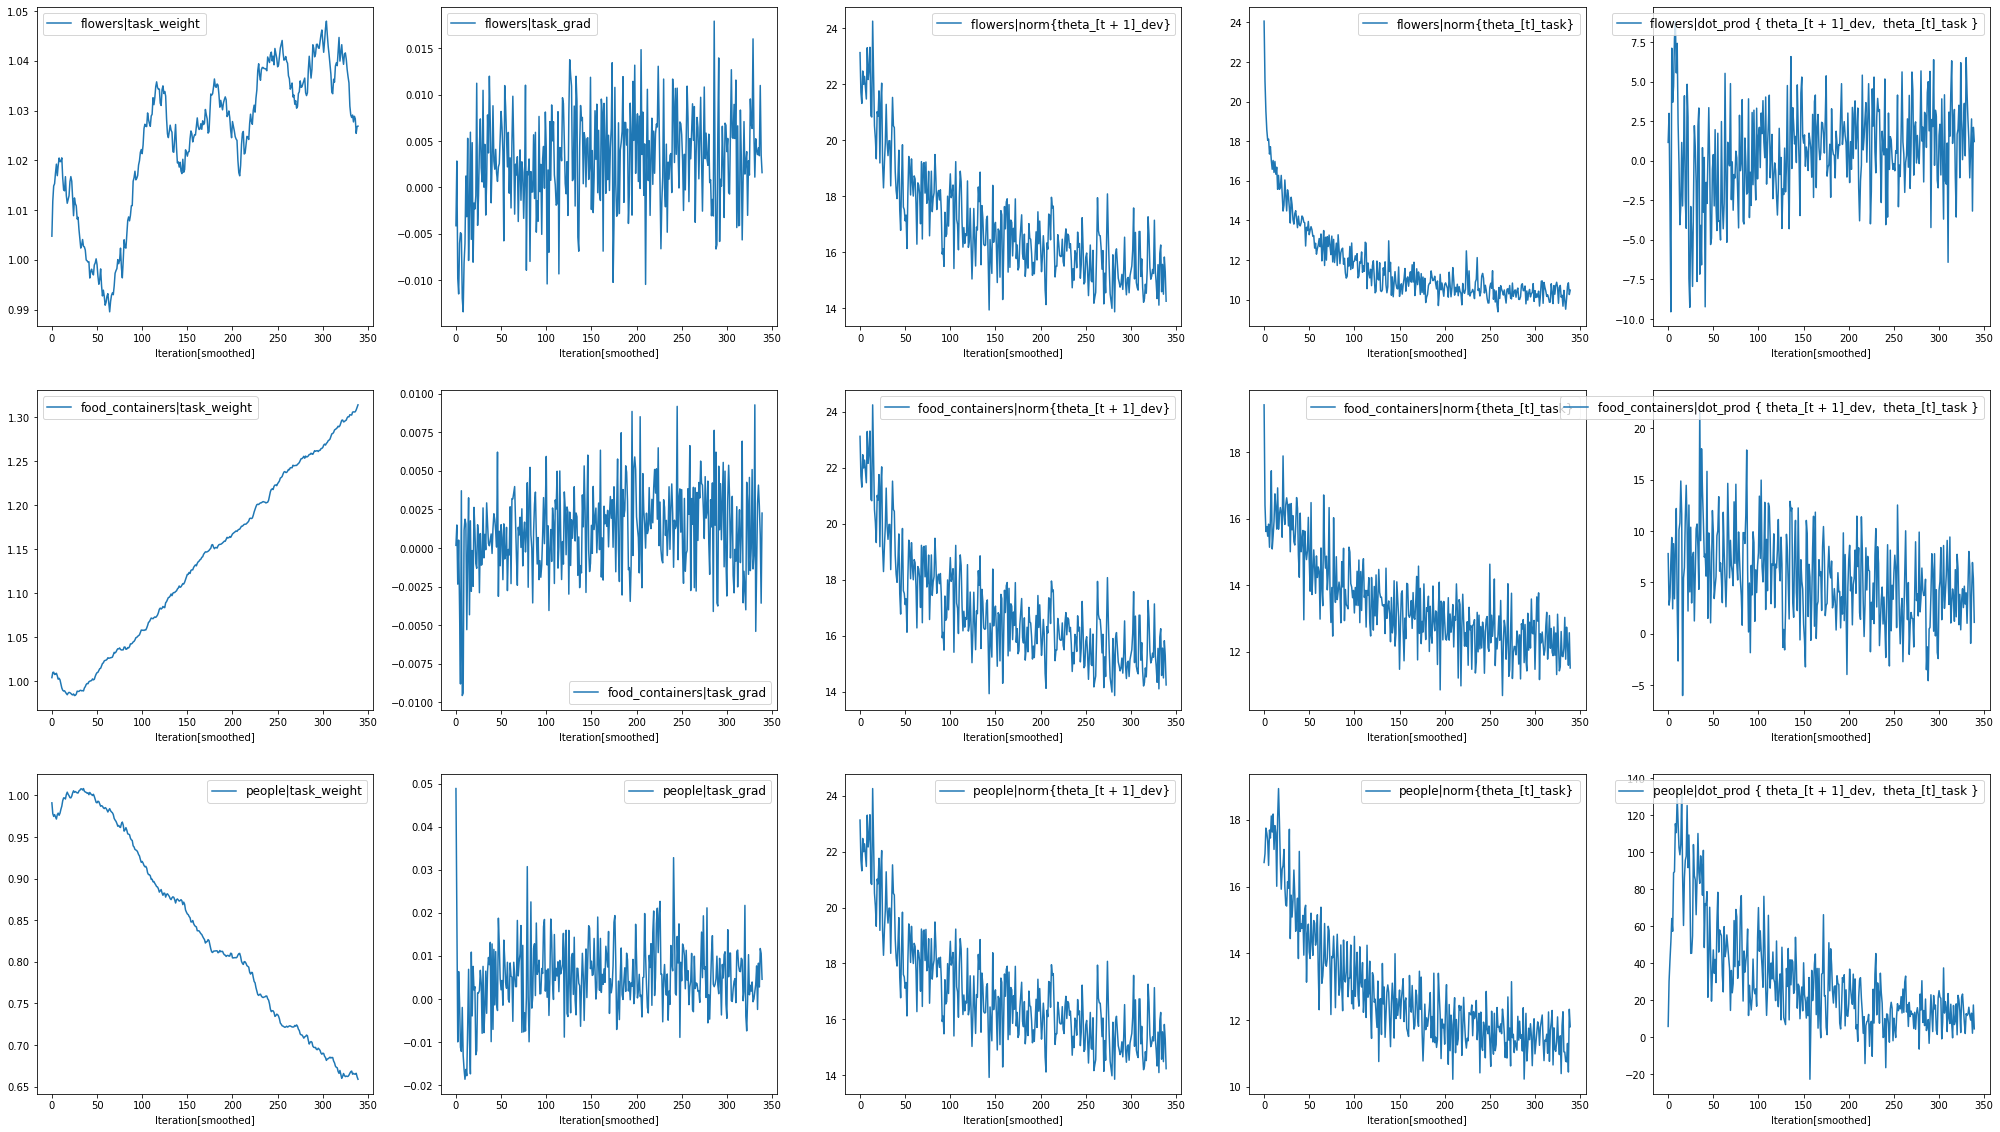

In [35]:
small_lr = 'sgd_vis_tests/sgd.linear.sgd_lr.1e-2.lr.1e-2.wlr.1e-1/meta_people/0/weight_stats.pkl'
vis_file(small_lr, smooth_factor=5)

# Large Learning Rate #
Observations : 
1. Evolution of primary task gradient matches expectation. Less clear trend due to less correlation between gradients evaluate at t, t+1

[Same issue as mentioned before] Primary task Gradients do not match expectations. Expected to be largely negative given that the dot product is largely positive but this is not the case.
    a. Could be responsible for why the graph of this run looks different from 
    
* Todo [ldery] - this run was made with using higher-library instead of manual grad computations. Try to figure out bug. Will affect the Adam runs since those experiments were done with Higher.

(3, 340, 5)


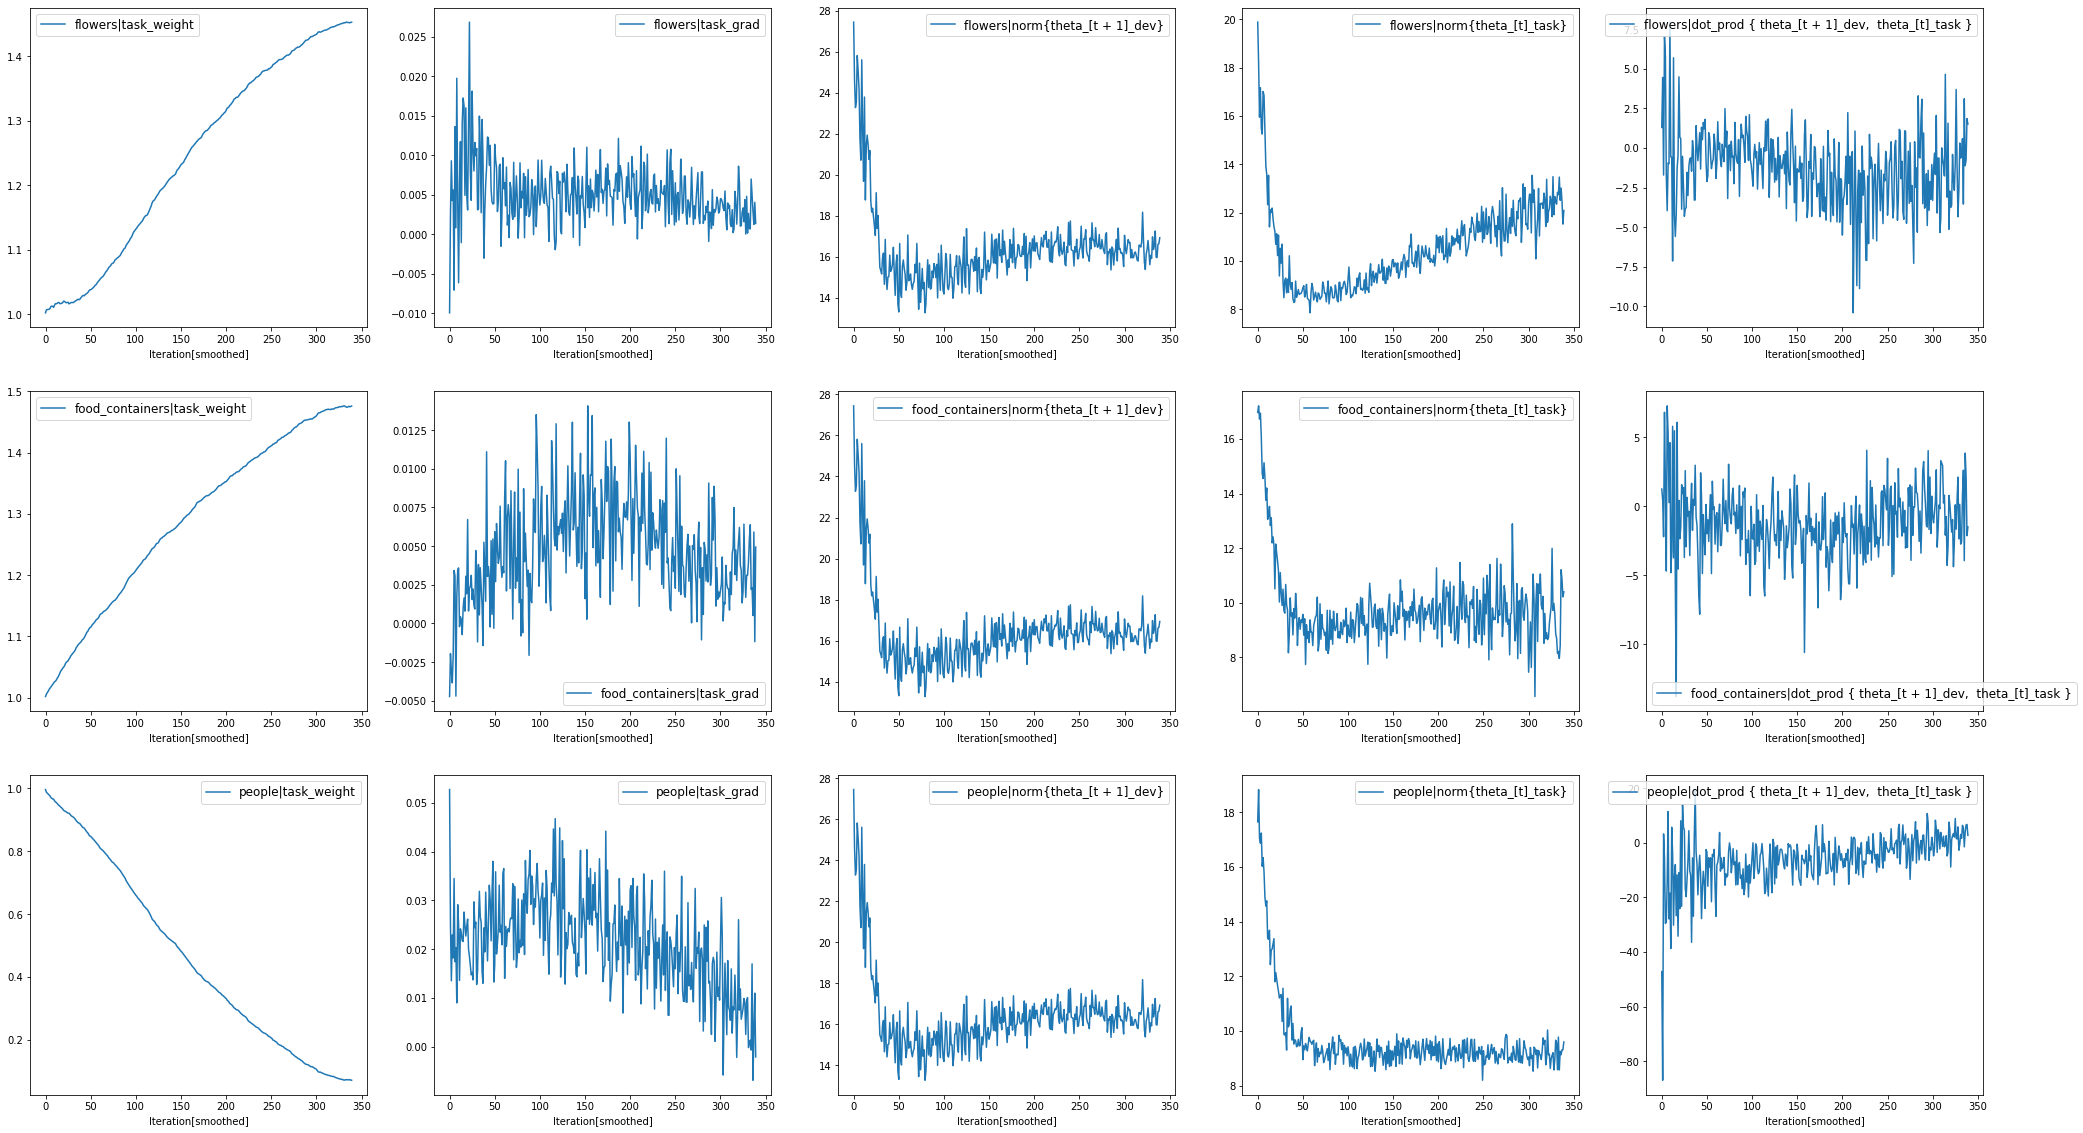

In [37]:
vis_file("sgd_vis_tests/sgd.linear.sgd_lr.1e-1.lr.1e-1.wlr.5e-2/meta_people/0/weight_stats.pkl", smooth_factor=5)

# Large Learning Rate -> Small Learning Rate. Steps @ 30epoch intervals #
Observations : 
1. Evolution of primary task gradient matches expectation. When the learning rate is reduced, the dot product becomes more positive - marking greater aligment between the primary task gradient and dev-gradient (at t+1). See epoch [30] below for the primary task (people)

[*Same issue as mentioned before*] Primary task Gradients do not match expectations. Expected to be largely negative given that the dot product is largely positive but this is not the case.
    a. Could be responsible for why the graph of this run looks different from 
    
* Todo [ldery] - this run was made with using higher-library instead of manual grad computations. Try to figure out bug. Will affect the Adam runs since those experiments were done with Higher.

(3, 100, 5)


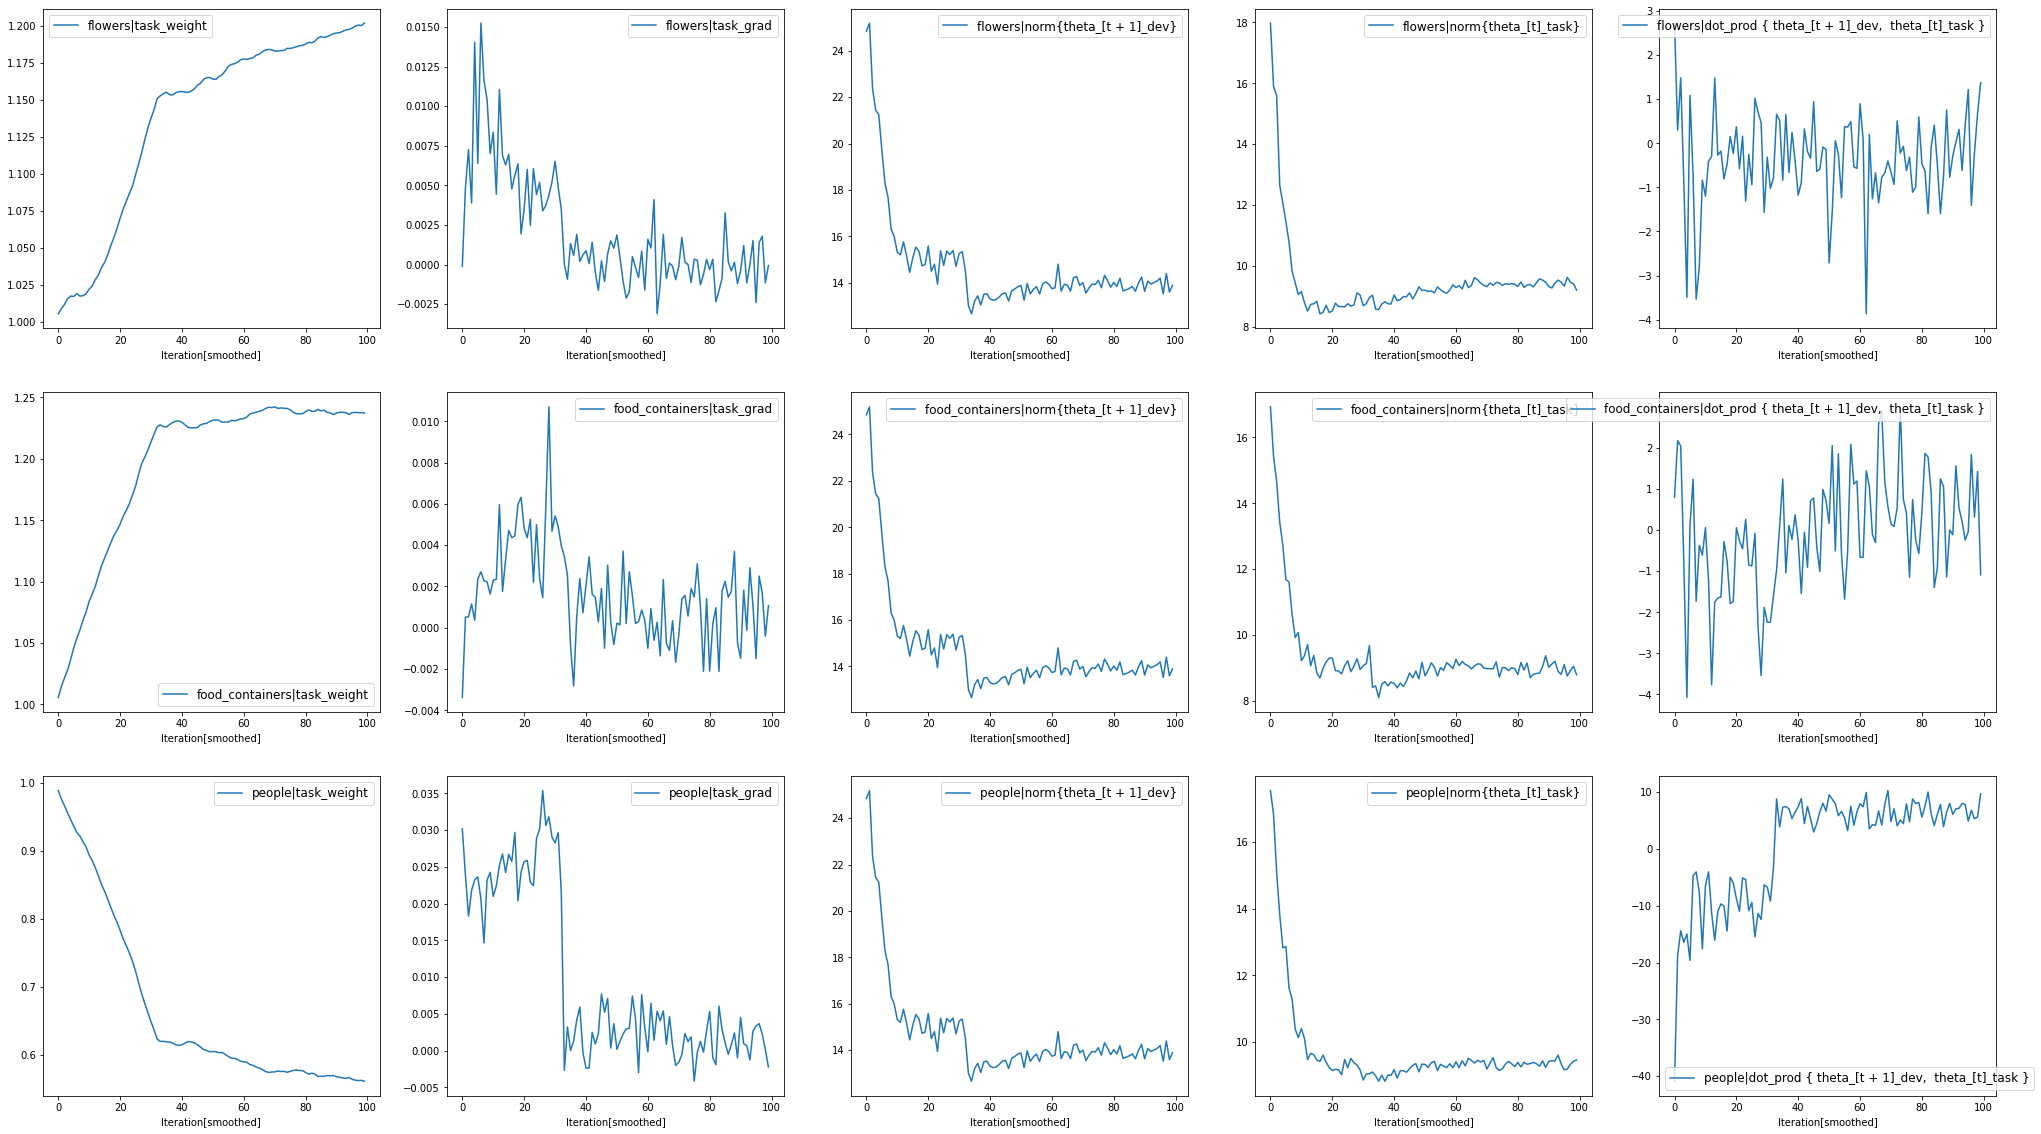

In [38]:
vis_file("sgd_vis_tests/sgd.linear.sgd_lr.1e-1.lr.1e-1.wlr.5e-2_stepped_lr/meta_people/0/weight_stats.pkl", smooth_factor=17)

# Do the dot products agree with the gradient directions #

In [45]:
prdxt = (-small_lr_np[:, :, 1] * small_lr_np[:, :, -1])
mean_prdxt = (prdxt > 0).mean(axis=-1)
# This should be equal to 1.0
print(mean_prdxt)

[0.62352941 0.54235294 0.50823529]
